# Sklearn RandomForestClassifier / Xgboost XGBClassifier

## Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Load datasets

In [2]:
train = pd.read_csv('./datasets/train.csv')
val = pd.read_csv('./datasets/val.csv')
test = pd.read_csv('./datasets/test.csv')

## Create model

We will now use XGBClasifier from xgboost library.  
We can use RandomForestClassifier from sklearn.ensemble library. To do so, uncomment `from sklearn.ensemble import RandomForestClassifier` and `model = RandomForestClassifier()` and comment xgb lines in next cell.

In [3]:
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#model = RandomForestClassifier()
model = XGBClassifier()

## Train model

To use `XGBClassifier` (or `RandomForestClassifier`), we need to:
- set the `target_column` (the one the model will predict)
- get this column off `train` and `val` sets and store it in `y_train` and `y_val`
- store the rest of the sets (features) in `X_train` and `X_value`

In [4]:
target_column = "SeriousDlqin2yrs"
y_train = train[target_column].values
X_train = train.drop(columns=target_column).values
y_val = val[target_column].values
X_val = val.drop(columns=target_column).values

We use the `fit` function to train the model passing it  `X_train` and `y_train` as arguments.

In [5]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Get prediction

Now, we want the '1 probability'. We use the `predict_proba` function of the model, which returns '0 probability' and '1 probability' and store column 1 ('1 probability') in `y_val_proba`.

In [6]:
y_val_proba = model.predict_proba(X_val)[:,1]

The function `set_prediction` takes threshold as argument and returns 1 if '1 probability' stored in y_val_proba is greater than threshold else retuns 0.

In [7]:
def set_prediction(threshold):
    return [1 if p> threshold else 0 for p in y_val_proba]

We apply this function with a threshold of 0.5 and store results in `y_pred`.

In [8]:
threshold = 0.5
y_pred = set_prediction(threshold)

## Get metrics

The function `confusion_matrix` returns the number of true negatives , false positives , false negatives and true positives .

In [9]:
cm = confusion_matrix(y_pred, y_val)
conf_mat = pd.DataFrame(cm)
conf_mat

,0,1
0,27791,1591
1,268,350


From `sklearn.metrics`, we use `roc_auc_score` and `roc_curve` to get ROC AUC score and plot the Roc Curve

In [10]:
roc_auc_score(y_val, y_val_proba)

0.8656153509902837

In [11]:
FPR, TPR, thresholds = roc_curve(y_val, y_val_proba)

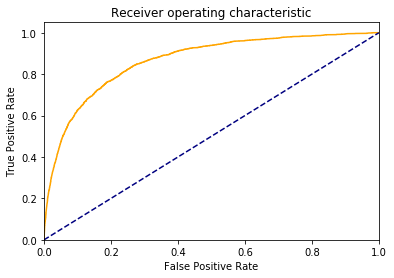

In [12]:
plt.plot(FPR,TPR,color='orange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

## Data formating

Formating data as required by the Kaggle competition rules.

In [13]:
y_test = test[target_column].values
X_test = test.drop(columns=target_column).values

y_test_proba = model.predict_proba(X_test)[:,1]

Id = [i for i in range(len(X_test))]

kaggle_df = pd.DataFrame({'Id': Id, 'Probability': y_test_proba})
kaggle_df

,Id,Probability
0,0,0.067461
1,1,0.044818
2,2,0.012977
3,3,0.079381
4,4,0.087699
...,...,...
101498,101498,0.029141
101499,101499,0.457939
101500,101500,0.006349
101501,101501,0.087865


## Save Prediction

Don't forget to change the csv file name if you change the model.

In [16]:
kaggle_df.to_csv('./results/kaggle_sub_XGBClassifier.csv', index=False)